In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [4]:
df = pd.read_csv('data/blurb/blurb_top.csv',delimiter=',',encoding='latin-1')
label_map = {}
index = 0
for label_item in df.label:
    try:
        label_map[label_item]
    except KeyError:
        label_map[label_item] = index
        index = index + 1
df.replace(label_map, inplace=True)

<Figure size 576x432 with 0 Axes>

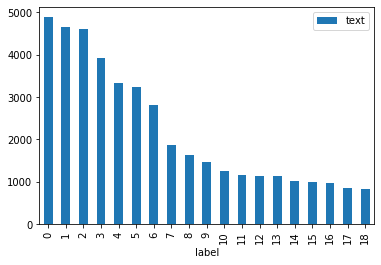

In [3]:
fig = plt.figure(figsize=(8,6))
df.groupby('label').count().plot.bar(ylim=0)
plt.show()

In [4]:
df.text=df.text.fillna(' ')
X_train, X_test, y_train, y_test = train_test_split(df.text, df.label, train_size=0.8, stratify=df.label)

In [5]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
tdidf_vectorizer = tfidf.fit(X_train)

In [6]:
X_train=tdidf_vectorizer.transform(X_train)
X_test=tdidf_vectorizer.transform(X_test)

In [7]:
classifier = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial')
classifier.fit(X_train, y_train)

c:\users\arun\envs\local\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
y_pred = classifier.predict(X_test)
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 1984
Accuracy: 0.76


In [16]:
pred_in=tdidf_vectorizer.transform(["What gardeners want most is a bigger and better return on their investment of time and moneyâ€”maximum yields and superior flavor for edibles, long-lasting blooms for flowers. Derek Fell's Grow This! features expert advice for choosing and growing the top-performing plants (and avoiding the ones that disappoint). Derek Fell has grown hundreds of varieties and annually visits gardens and test plots across America, so he's qualified to guide gardeners to the best of the bestâ€”more than 600 vegetable, flower, herb, and lawn grass all-stars. He offers honest feedback about plant performance, even when it contradicts favorable public opinion or a grower's claims. Seed racks may be filled with â€˜Kentucky Wonder' snap beans, but he dismisses that variety as too fibrous and needy and instead recommends â€˜Blue Lake' beans for tenderness and high yields. Fell's firsthand experience means the difference between choosing plant winners and losers. Packed with insider evaluations from seedsmen, growers, and nursery retailers that readers won't find elsewhere, Derek Fell's Grow This! explains industry lingo and debunks marketing hype to help gardeners select the best-performing plants for all garden conditions and goals."])
classifier.predict_proba(pred_in)

array([[0.06742467, 0.02156139, 0.02524558, 0.02044928, 0.03947095,
        0.03548648, 0.02960323, 0.05090403, 0.02770071, 0.03234281,
        0.01401391, 0.01614761, 0.05922463, 0.04441854, 0.01182937,
        0.03431344, 0.0149678 , 0.41748753, 0.03740804]])

In [10]:
label_map

{"Children's Middle Grade Books": 0,
 'Literary Fiction': 1,
 'Mystery and Suspense': 2,
 'Romance': 3,
 'Biography and Memoir': 4,
 'Religion and Philosophy': 5,
 'Graphic Novels and Manga': 6,
 'Cooking': 7,
 'Politics': 8,
 'Arts and Entertainment': 9,
 'Fantasy': 10,
 'Teen and Young Adult Fiction': 11,
 'Self-Improvement': 12,
 'Health and Fitness': 13,
 'History': 14,
 'Popular Science': 15,
 'Science Fiction': 16,
 'Crafts, Home and Garden': 17,
 'Reference': 18}